# Problem 1

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVC

In [9]:
df = pd.read_csv("house_data.csv",sep=',')
print(df.shape)
df.head()

(21613, 21)


id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [10]:
corr = df.corr()
print(corr.shape)
print('Dataset Correlation:')
print(corr)

(20, 20)
Dataset Correlation:
                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621  

<AxesSubplot:>

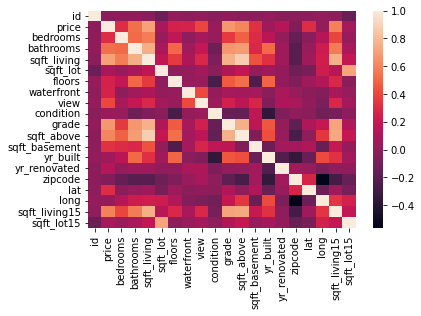

In [11]:
sns.heatmap(corr)

In [12]:
feature = ['sqft_living','bathrooms','grade','sqft_above','sqft_lot']
space = df[feature]
price = df['price']
print(space)
print(price)

       sqft_living  bathrooms  grade  sqft_above  sqft_lot
0             1180       1.00      7        1180      5650
1             2570       2.25      7        2170      7242
2              770       1.00      6         770     10000
3             1960       3.00      7        1050      5000
4             1680       2.00      8        1680      8080
...            ...        ...    ...         ...       ...
21608         1530       2.50      8        1530      1131
21609         2310       2.50      8        2310      5813
21610         1020       0.75      7        1020      1350
21611         1600       2.50      8        1600      2388
21612         1020       0.75      7        1020      1076

[21613 rows x 5 columns]
0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64


In [13]:
a = np.array(space)
b = np.array(price)
print(a.shape)
print(a)
print(b.shape)
print(b)

(21613, 5)
[[1.180e+03 1.000e+00 7.000e+00 1.180e+03 5.650e+03]
 [2.570e+03 2.250e+00 7.000e+00 2.170e+03 7.242e+03]
 [7.700e+02 1.000e+00 6.000e+00 7.700e+02 1.000e+04]
 ...
 [1.020e+03 7.500e-01 7.000e+00 1.020e+03 1.350e+03]
 [1.600e+03 2.500e+00 8.000e+00 1.600e+03 2.388e+03]
 [1.020e+03 7.500e-01 7.000e+00 1.020e+03 1.076e+03]]
(21613,)
[221900 538000 180000 ... 402101 400000 325000]


In [14]:
atrain,atest,btrain,btest = train_test_split(a,b,test_size=0.7)
print(atrain.shape)
print(atest.shape)
print(btrain.shape)
print(btest.shape)

(6483, 5)
(15130, 5)
(6483,)
(15130,)


In [15]:
regressor = LinearRegression()
regressor.fit(atrain,btrain)

LinearRegression()

In [16]:
regressor.intercept_

-623841.5132801523

In [17]:
regressor.coef_

array([ 2.62117251e+02, -3.84720038e+04,  1.09972110e+05, -7.63860083e+01,
       -2.02406448e-01])

## Applying the regressor on test set


In [18]:
bpred = regressor.predict(atest)

### Finding the r2 score


In [20]:
r2_score(btest,bpred)
print("ML Accuracy of the model is:",r2_score(btest,bpred))

ML Accuracy of the model is: 0.5431692892295443


# PROBLEM 2 Classification (Support Vector Machine for Linearly separable Data)

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;sns.set()
from sklearn.datasets import make_blobs

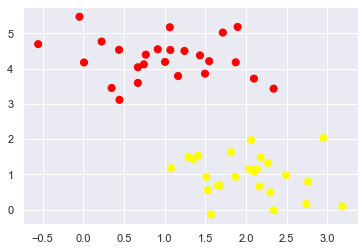

In [22]:
x,y = make_blobs(n_samples = 50,centers = 2,random_state=0, cluster_std = 0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

In [23]:
x

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [24]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

(-1.0, 3.5)

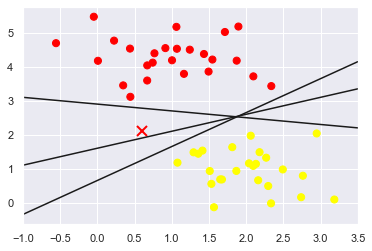

In [25]:
xfit = np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,r in[(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+r,'-k')
plt.xlim(-1,3.5)

In [26]:
xfit = np.linspace(-1,3.5)
xfit

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

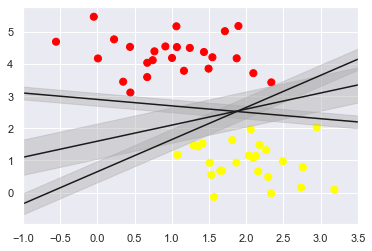

In [27]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for n,m,p in[(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = n*xfit + m
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-p,yfit+p,edgecolor='none',color = '#AAAAAA',alpha=0.4)
    plt.xlim(-1,3.5)

In [28]:
model = SVC(kernel = 'linear',C=1E10)
model.fit(x,y)

SVC(C=10000000000.0, kernel='linear')

In [29]:
model.decision_function

<bound method BaseSVC.decision_function of SVC(C=10000000000.0, kernel='linear')>

In [30]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

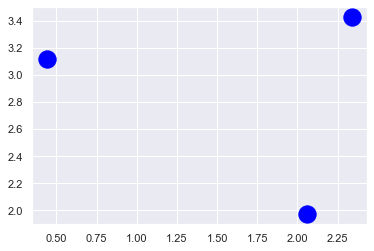

In [31]:
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors = 'blue')

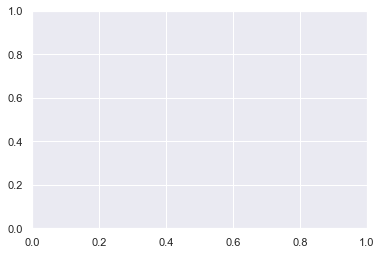

In [32]:
ax = plt.gca()